# A Generátor látens terében való keresés

Látens térben való keresés gradiens módszerrel

hibafüggvény: az L2 távolság minimalizálása

Jelölje $X$ a keresendő képet, $G$ a generátort, $z$ pedig a látens vektort.

A cél egy olyan $z$ látens vektor keresése, amellyel a lenti távolság minimalizálható.

$$ \min\left(\sum_{i=0}^{n-1}\sqrt{(X_i-G(z)_i)^2}\right)$$

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

2022-03-25 18:33:05.543272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-25 18:33:05.543318: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def denormalize_image(image):
    return (image.numpy() * 127.5 + 127.5).astype("uint32")

In [3]:
generator = keras.models.load_model('datas/weights/generator.h5')

2022-03-25 18:33:08.262279: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-25 18:33:08.262315: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-25 18:33:08.262340: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-03-25 18:33:08.262586: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
latent_dim = 100

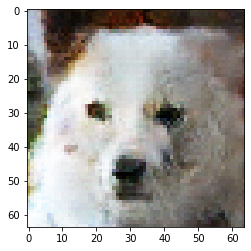

In [5]:
starter_image_noise = tf.random.normal([1, latent_dim])

starter_image = generator(starter_image_noise, training=False)

plt.imshow(denormalize_image(starter_image[0][0]))

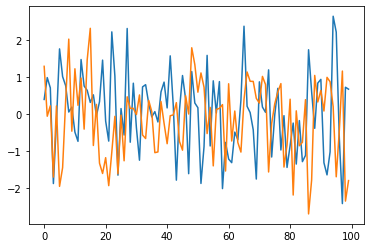

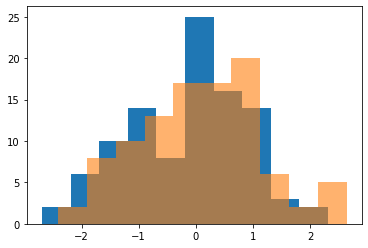

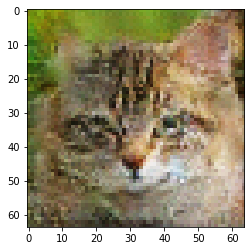

In [6]:
random_noise = tf.random.normal([1, latent_dim])

plt.plot(random_noise.numpy().flatten())
plt.plot(starter_image_noise.numpy().flatten())
plt.show()

plt.hist(starter_image_noise.numpy().flatten())
plt.hist(random_noise.numpy().flatten(), alpha=0.6)
plt.show()

generated_image = generator(random_noise, training=False)

plt.imshow(denormalize_image(generated_image[0][0]))

In [7]:
# The distance between the images with numpy

np.linalg.norm(starter_image[0][0]-generated_image[0][0])

85.38351

Epoch: 1, Loss: 85.38350677490234


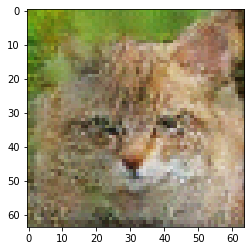

Epoch: 2, Loss: 74.7860107421875


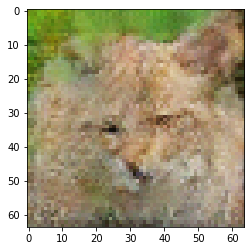

Epoch: 3, Loss: 64.7393569946289


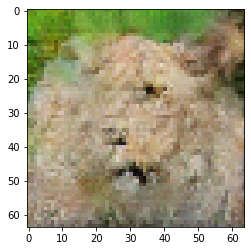

Epoch: 4, Loss: 58.06981658935547


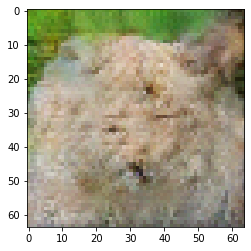

Epoch: 5, Loss: 52.17745590209961


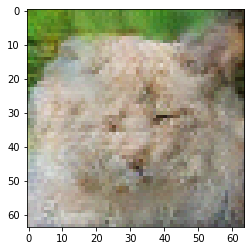

Epoch: 6, Loss: 47.7992057800293


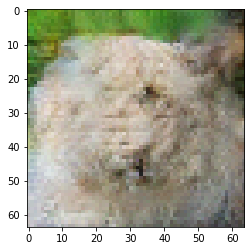

Epoch: 7, Loss: 45.02242660522461


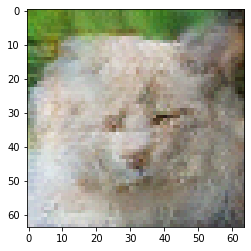

Epoch: 8, Loss: 42.72409439086914


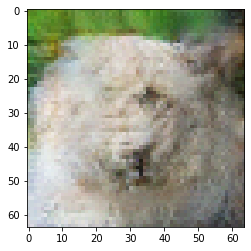

Epoch: 9, Loss: 41.53572082519531


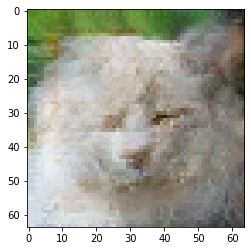

Epoch: 10, Loss: 39.882389068603516


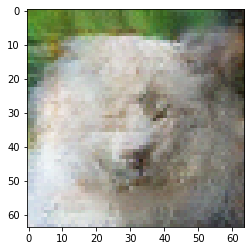

Epoch: 11, Loss: 38.43495178222656


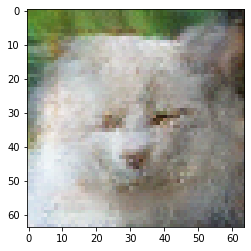

Epoch: 12, Loss: 37.21852111816406


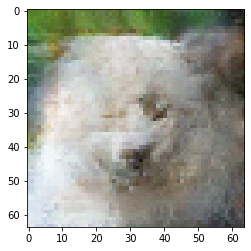

Epoch: 13, Loss: 36.1182975769043


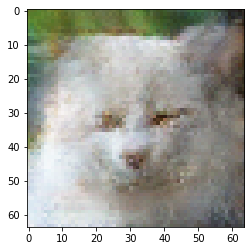

Epoch: 14, Loss: 35.39108657836914


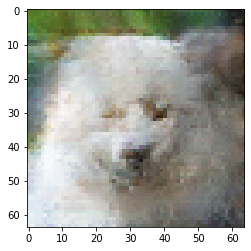

Epoch: 15, Loss: 34.58744430541992


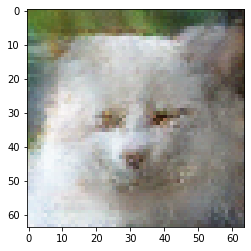

Epoch: 16, Loss: 33.85968780517578


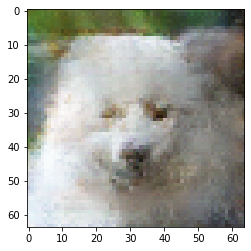

Epoch: 17, Loss: 33.10734176635742


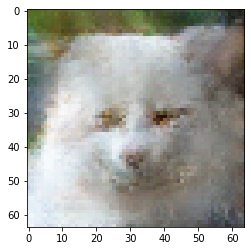

Epoch: 18, Loss: 32.34930419921875


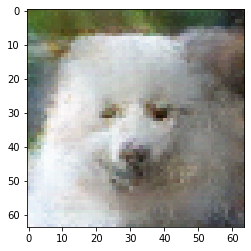

Epoch: 19, Loss: 31.450796127319336


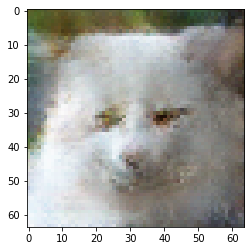

Epoch: 20, Loss: 30.73343849182129


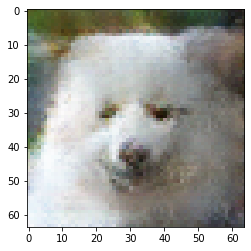

Epoch: 21, Loss: 29.98147964477539


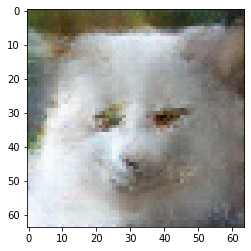

Epoch: 22, Loss: 29.936214447021484


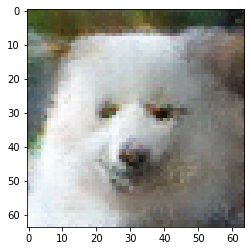

Epoch: 23, Loss: 28.948448181152344


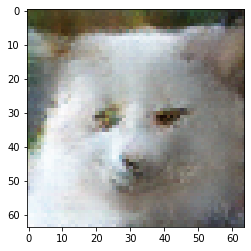

Epoch: 24, Loss: 28.394996643066406


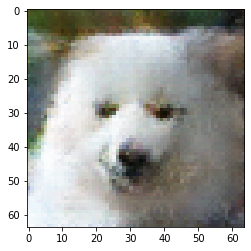

Epoch: 25, Loss: 28.365610122680664


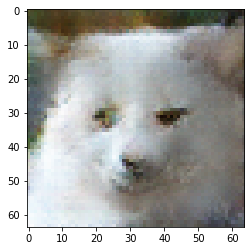

Epoch: 26, Loss: 27.238691329956055


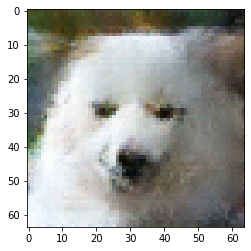

Epoch: 27, Loss: 26.87093734741211


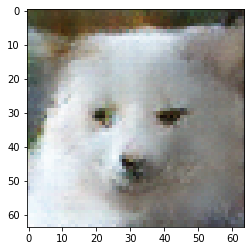

Epoch: 28, Loss: 26.164207458496094


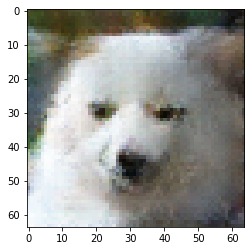

Epoch: 29, Loss: 25.523845672607422


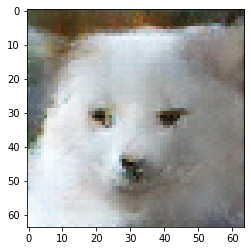

Epoch: 30, Loss: 27.1180477142334


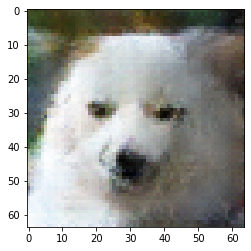

Epoch: 31, Loss: 26.05978012084961


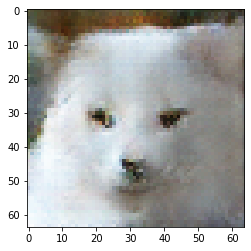

Epoch: 32, Loss: 28.888994216918945


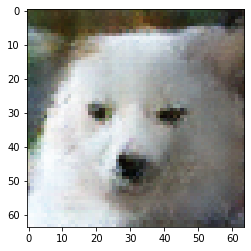

Epoch: 33, Loss: 22.843849182128906


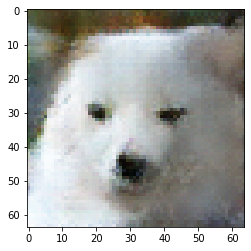

Epoch: 34, Loss: 22.246091842651367


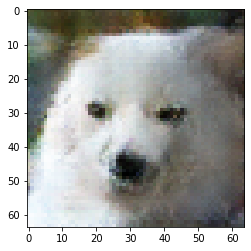

Epoch: 35, Loss: 22.855571746826172


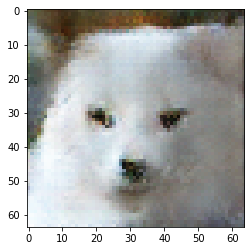

Epoch: 36, Loss: 26.325183868408203


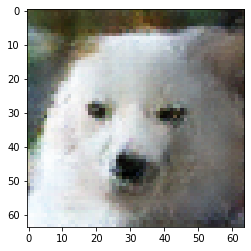

Epoch: 37, Loss: 22.429086685180664


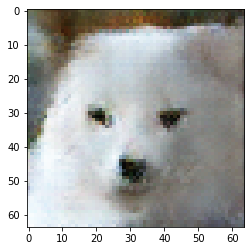

Epoch: 38, Loss: 24.688467025756836


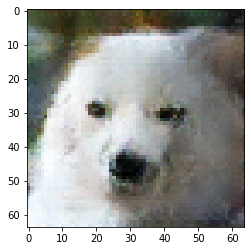

Epoch: 39, Loss: 23.109113693237305


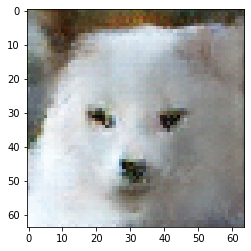

Epoch: 40, Loss: 26.792207717895508


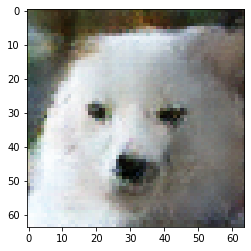

Epoch: 41, Loss: 20.349132537841797


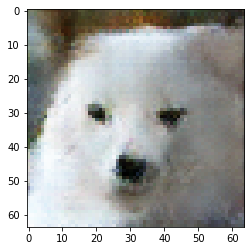

Epoch: 42, Loss: 20.37820816040039


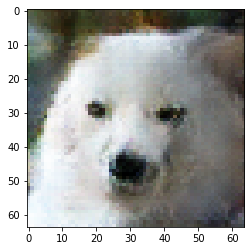

Epoch: 43, Loss: 22.003393173217773


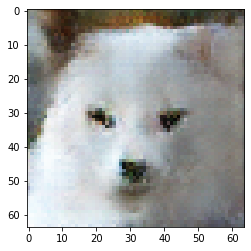

Epoch: 44, Loss: 26.60979652404785


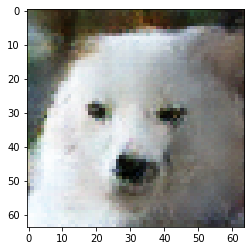

Epoch: 45, Loss: 19.73470687866211


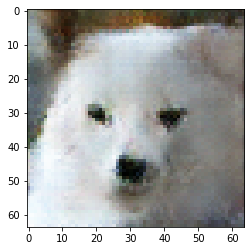

Epoch: 46, Loss: 20.774904251098633


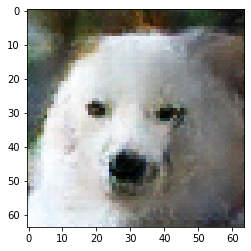

Epoch: 47, Loss: 23.52126121520996


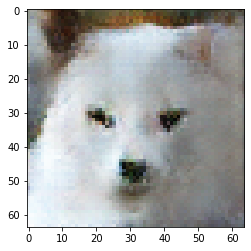

Epoch: 48, Loss: 27.137435913085938


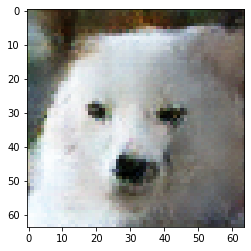

Epoch: 49, Loss: 18.38254165649414


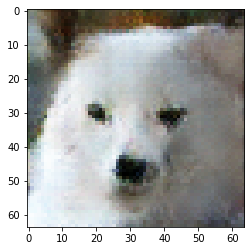

Epoch: 50, Loss: 18.394271850585938


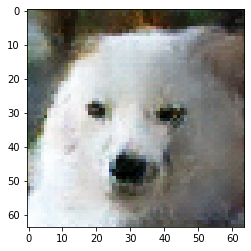

In [8]:
noise = tf.Variable(random_noise, name='noise')

step_size = 0.1

for i in range(50):
    with tf.GradientTape() as g_tape:
        g_tape.watch(noise)

        image = generator(noise, training=False)[0][0]

        plt.imshow(denormalize_image(image))

        loss = tf.norm(starter_image[0][0]-image)

    gradients = g_tape.gradient(
        loss, noise
    )
    
    noise = noise - (step_size * gradients)

    generated = generator(noise, training=False)[0][0]
    
    print(f"Epoch: {i+1}, Loss: {loss}")
    plt.imshow(denormalize_image(generated))
    plt.show()

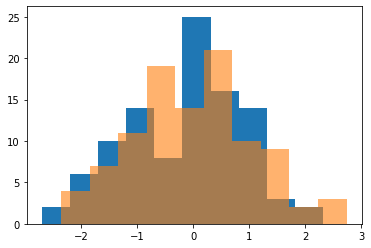

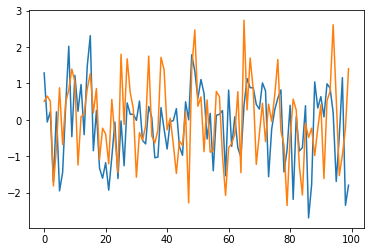

In [9]:
plt.hist(starter_image_noise.numpy().flatten())
plt.hist(noise.numpy().flatten(), alpha=0.6)
plt.show()

plt.plot(starter_image_noise.numpy().flatten())
plt.plot(noise.numpy().flatten())
plt.show()


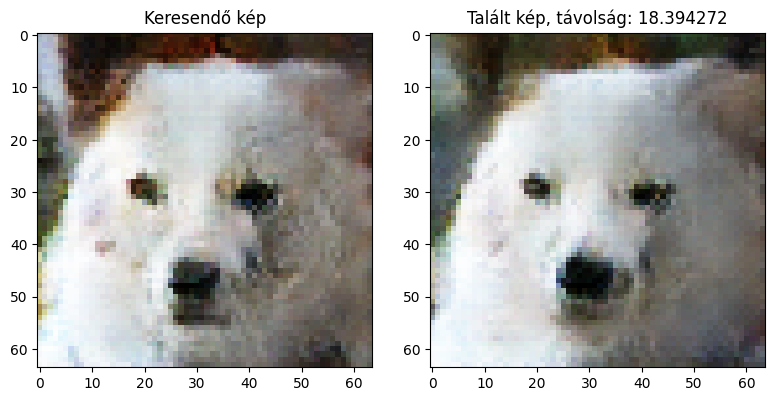

In [10]:
starter = generator(starter_image_noise ,training=False)
found = generator(noise ,training=False)

distance = loss

fig, axes = plt.subplots(figsize=(8, 4), nrows=1, ncols=2, dpi=100)
plt.tight_layout()
axes[0].set_title("Keresendő kép")
axes[0].imshow(denormalize_image(starter[0][0]), interpolation='none')

axes[1].set_title("Talált kép" + ", távolság: " + str(distance.numpy()))
axes[1].imshow(denormalize_image(found[0][0]), interpolation='none')